In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt


I imported the appropriate `python` packages that I need to perform calculations.

In [3]:
data_on_311 = pd.read_csv("311-data.csv", index_col= "_id")
data_on_311.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
_id,,,,,,,,,,,,,,,,,
70915,161823.0,2017-06-14T10:03:00,Rodent control,Call Center,1,Animal Care & Control,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.943235,40.467422,APPROXIMATE
48238,178453.0,2017-08-11T08:03:00,Illegal Parking,Call Center,1,Police - Zones 1-6,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,-79.916473,40.430555,APPROXIMATE
38897,178457.0,2017-08-11T08:37:00,Potholes,Call Center,1,DPW - Street Maintenance,Beltzhoover,4.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-79.998201,40.413781,EXACT
57156,178460.0,2017-08-11T08:45:00,Dead tree (Public property),Call Center,1,DPW - Forestry Division,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.030003,40.415902,EXACT
53592,178463.0,2017-08-11T08:49:00,Weeds/Debris,Call Center,1,"Permits, Licenses and Inspections",Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,-79.990583,40.393540,EXACT
49353,178466.0,2017-08-11T08:59:00,Litter,Call Center,1,DPW - Street Maintenance,Allentown,3.0,18.0,4.200318e+10,5.0,18.0,3.0,4-5,-79.995679,40.424059,EXACT
70925,161573.0,2017-06-13T14:47:00,Tree Fallen Across Road,Call Center,1,DPW - Street Maintenance,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,-79.997125,40.399176,EXACT
70927,161594.0,2017-06-13T15:41:00,Tree Fallen Across Road,Call Center,1,DPW - Street Maintenance,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.968387,40.424271,EXACT
58038,178467.0,2017-08-11T09:01:00,Dead Animal,Call Center,1,Animal Care & Control,Beltzhoover,3.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-80.000102,40.414922,EXACT


I loaded the dataset I will be using. It is 311 data. I also grabbed the first 10 attributes. 

In [4]:
neighborhoodfrequency = data_on_311["NEIGHBORHOOD"].value_counts()
neighborhoodfrequency

Brookline               22609
Carrick                 21614
Squirrel Hill South     18737
South Side Slopes       18349
South Side Flats        16644
                        ...  
East Carnegie             527
Northview Heights         526
Glen Hazel                369
Arlington Heights         113
Mount Oliver Borough       61
Name: NEIGHBORHOOD, Length: 91, dtype: int64

This shows how many times each given neighborhood had a call recorded about them. It shows the frequency of the neighborhoods in order from most appeared to least appeared. As you can see, it shows **Mount Oliver Borough** as the least amount of times people called to make a complain about. 

In [5]:
query_mask = data_on_311['NEIGHBORHOOD'] == "Mount Oliver Borough"
mountoliborough = data_on_311[query_mask]
mountoliborough["REQUEST_TYPE"].count()

61

I created a query mask just to prove that Mount Oliver Borough was only mentioned 61 times, the lowest out of this entire dataset. This query mask counts how many times specifically Mount Oliver Borough is mentioned in this dataset.

In [6]:
pd.DataFrame(neighborhoodfrequency)

,NEIGHBORHOOD
Brookline,22609
Carrick,21614
Squirrel Hill South,18737
South Side Slopes,18349
South Side Flats,16644
...,...
East Carnegie,527
Northview Heights,526
Glen Hazel,369
Arlington Heights,113


I turned the neighborhood frequency into a data frame. It shows that there are 91 rows, meaning that there are 91 different recordings. 

In [7]:
safe_neighborhoods = pd.DataFrame(neighborhoodfrequency.tail(45))
safe_neighborhoods

,NEIGHBORHOOD
East Hills,4779
Arlington,4278
Manchester,4273
Strip District,4032
Banksville,3919
Polish Hill,3785
Duquesne Heights,3748
Spring Hill-City View,3667
Crawford-Roberts,3525
Bluff,3261


I made a variable called "safe neighborhoods" which just grabs the last 45 neighborhoods in the dataset. These are the neighborhoods with the least calls about them, making them the safest. They are the bottom half of the dataset.  

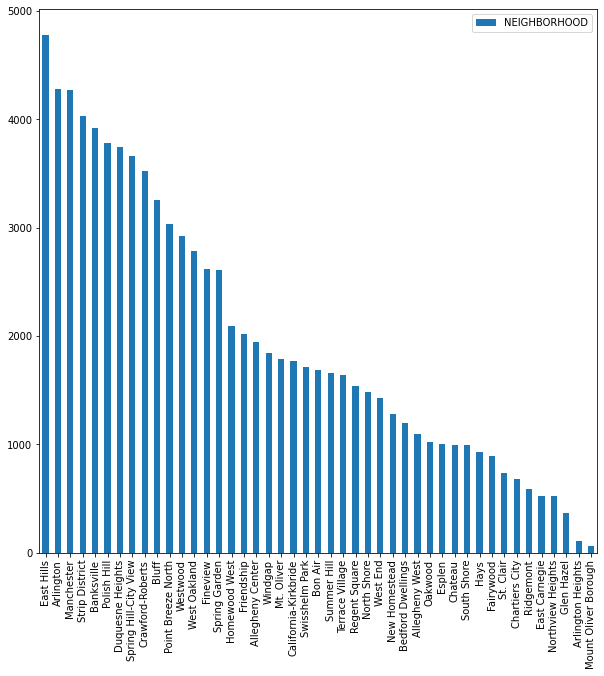

In [8]:
safe_neighborhoods.plot.bar(figsize = (10,10))

I plotted the safest neighborhoods to get a visualization of just HOW safe Mount Oliver Borough is compared with the other safe neighborhoods. You can see how little calls Mount Oliver recieved in comparison to the rest.

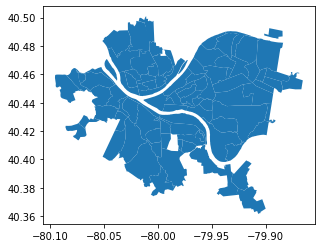

In [14]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

I loaded this plain map of Pittsburgh using geopandas.

In [23]:
requests_map = neighborhoods.merge(neighborhoodfrequency, how = 'left', left_on = 'hood', right_on = neighborhoodfrequency.index)
requests_map[['hood', 'NEIGHBORHOOD', 'geometry']].head()

,hood,NEIGHBORHOOD,geometry
0,Central Oakland,6932,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,4891,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,2786,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3525,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,4032,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


I started the processs of loading the data on 311 into the plain map of Pittsburgh to show the range of safeness amongst the neighborhoods. I grabbed the first five just to show it was working. 

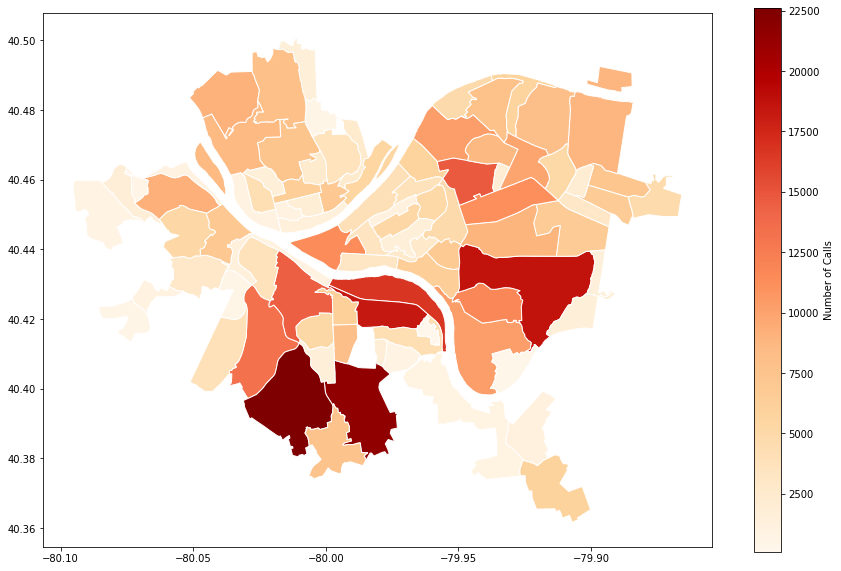

In [24]:
requests_map.plot(column='NEIGHBORHOOD',
                 cmap = 'OrRd',
                 edgecolor = 'white',
                 legend = True,
                 legend_kwds = {'label': 'Number of Calls'},
                 figsize = (15, 10),
                )
                 

I adjusted the colors and the key to apply the 311 data to the actual map of Pittsburgh. As you can see where Mount Oliver is, it clearly has the lowest values compared to the other neighborhoods, thus, making it the safest. 